<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [31]:
%matplotlib notebook

1. Start in different locations

In [36]:
import torch
from torch.utils.data import Dataset, DataLoader

from fastprogress.fastprogress import master_bar, progress_bar

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from jupyterthemes import jtplot
from IPython.display import HTML

jtplot.style(context="talk")

In [2]:
class ParaboloidDataset(Dataset):
    """A toy dataset"""

    ...

In [8]:
def loss_landscape_function(X):
    """Generate a pretty loss landscape."""

    # Portion below x-y plane (l < 0)
    l1 = size * torch.exp(-(X ** 2).sum(dim=1) / 2) / (2 * torch.pi)

    # Portion above x-y plane (l > 0)
    shift = torch.tensor([1.5, 0.5])
    l2 = size * torch.exp(-(((X - 1) / shift) ** 2).sum(dim=1) / 2) / (1.5 * torch.pi)

    return 1.5 * (l2 - l1)


def loss_landscape_plot_data(size, step=0.1):
    x1 = x2 = torch.arange(-size, size, step)
    X1, X2 = torch.meshgrid(x1, x2, indexing="ij")
    X = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    L = loss_landscape_function(X).reshape_as(X1)
    return X1, X2, L


def plot_loss_landscape(size, step=0.1):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection="3d")

    X1, X2, L = loss_landscape_plot_data(size, step)
    ax.contourf(X1, X2, L, zdir="z", offset=-1, zorder=1)
    ax.plot_surface(X1, X2, L, zorder=2)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-1, 1)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.set_xlabel("Parameter 1")
    ax.set_ylabel("Parameter 2")
    ax.set_zlabel("Loss")

    return ax

In [45]:
size = 3

W = torch.tensor([[1.5, 1.0]], requires_grad=True)

optimizer = torch.optim.SGD([W], lr=0.1)
# optimizer = torch.optim.SGD([W], lr=0.1, momentum=0.9)
# optimizer = torch.optim.RMSprop([W], lr=0.1)
# optimizer = torch.optim.Adam([W], lr=0.1)

criterion = torch.nn.MSELoss()

w1s = []
w2s = []
ls = []

for epoch in range(100):
    loss = loss_landscape_function(W)

    w1s.append(W[0][0].item())
    w2s.append(W[0][1].item())
    ls.append(loss.item() + 0.05)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

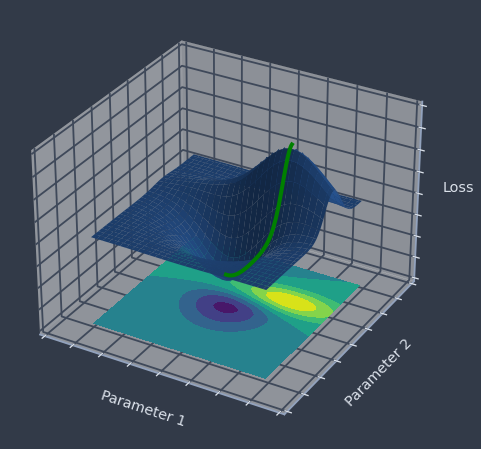

In [46]:
size = 3
ax = plot_loss_landscape(size)
ax.plot(w1s, w2s, ls, color="green", linewidth=4, zorder=11)

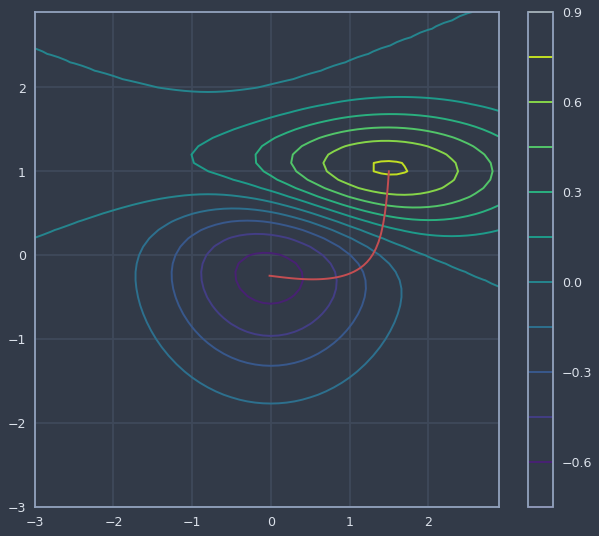

In [47]:
X1, X2, L = loss_landscape_plot_data(size, 0.1)
plt.contour(X1, X2, L, levels=10)
plt.plot(w1s, w2s, "r")
plt.colorbar()

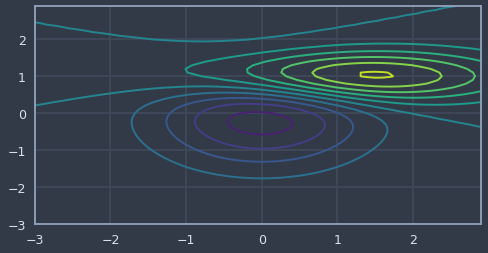

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))

# ax.set_xlim([-2.5, 2.5])
# ax.set_ylim([-5, 20])

ax.contour(X1, X2, L, levels=10)
(line,) = ax.plot([], [], color="r", lw=2)


def animate(frame):
    line.set_data(w1s[:frame], w2s[:frame])
    return (line,)


animation = FuncAnimation(fig, animate, len(w1s))

In [51]:
HTML(animation.to_jshtml())